<div class = "page-header">
    <h1 class = "alert alert-info">
    Study of mode-seeking clustering techniques<br/>
    <small>
        Henrique Gasparini Fiuza do Nascimento - started: 04/02/2017<br/>
    </small>
    </h1> 
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>

In [16]:
import pandas as pd
import numpy as np

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab


# import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

# Visualization param
pd.options.display.max_columns = None
pd.options.display.max_rows = None

#import classes Point and HillClimbing from TD2
import modeSeeking.point as po

<div class="alert alert-success">
    <h2>
        Preprocessing
    </h2>
</div>
<h4 class="alert alert-warning">We produce a new file with only numerical data where each line represents a point</h4>


In [17]:
#import data
df = pd.read_csv('../../../Data/NBA-data-With-Positions.csv')
print "(rows,cols) =",df.shape
df.head(5)

(rows,cols) = (476, 31)


,Unnamed: 0,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev,SALARY
0,0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG,2250000
1,1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF,4171680
2,2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG,525093
3,3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF,1938840
4,4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C,12000000


In [18]:
df.describe()

,Unnamed: 0,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,SALARY
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,4.760000e+02
mean,237.500000,27.052521,54.785714,27.464286,27.321429,20.157773,3.113235,6.951681,44.315966,0.688025,1.963655,27.020588,1.434874,1.911555,71.973319,0.870378,2.754832,3.620588,1.826261,1.146849,0.653361,0.415126,1.744538,4.424370,0.157563,8.349370,-0.399790,4.804590e+06
std,137.553626,4.407574,24.274576,16.478017,15.219228,9.223976,2.053724,4.420890,8.783619,0.713570,1.862574,16.227345,1.307888,1.652358,17.903679,0.775428,1.769210,2.407671,1.756553,0.782957,0.438861,0.448180,0.742706,9.506151,1.136183,5.652556,3.077754,5.311455e+06
min,0.000000,19.000000,1.000000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,3.088800e+04
25%,118.750000,24.000000,37.000000,14.000000,15.000000,13.000000,1.500000,3.500000,40.400000,0.100000,0.300000,20.000000,0.575000,0.800000,66.700000,0.300000,1.500000,1.900000,0.675000,0.600000,0.300000,0.100000,1.200000,0.000000,0.000000,4.000000,-2.000000,1.140240e+06
50%,237.500000,26.000000,62.000000,28.000000,28.000000,19.950000,2.700000,5.950000,43.900000,0.500000,1.500000,32.350000,1.000000,1.400000,75.400000,0.600000,2.350000,3.100000,1.300000,0.900000,0.600000,0.300000,1.800000,0.000000,0.000000,7.000000,-0.500000,2.614748e+06
75%,356.250000,30.000000,76.000000,40.000000,38.000000,28.025000,4.400000,9.600000,48.200000,1.100000,3.125000,36.725000,1.900000,2.600000,82.600000,1.200000,3.600000,4.800000,2.325000,1.500000,0.900000,0.500000,2.200000,4.000000,0.000000,11.625000,1.100000,6.277500e+06
max,475.000000,40.000000,82.000000,73.000000,71.000000,42.400000,10.200000,20.500000,100.000000,5.100000,11.200000,100.000000,8.800000,10.200000,100.000000,4.900000,10.300000,14.800000,11.700000,4.600000,2.100000,3.700000,6.000000,66.000000,18.000000,30.100000,13.200000,2.500000e+07


<h4 class="alert alert-warning">Saving positions numbers</h4>

In [62]:
dict = {' PG': 0, ' PF': 1, ' SG' : 0, ' SF' : 1, ' C' : 2}
invdict = {0 : 'G', 1 : 'F', 2 : 'C'}

actual_positions = [dict[x] for x in df['PosicAbbrev']]
df_num = df.select_dtypes(include=['number']).drop(['Unnamed: 0'], 1)

In [63]:
df_num.head(5)

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,SALARY
0,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,2250000
1,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,4171680
2,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,525093
3,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,1938840
4,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,12000000


<h4 class="alert alert-warning">Scaling data</h4>

In [64]:
cols = df_num.columns
df_num = sk.preprocessing.scale(df_num)
df_num = pd.DataFrame(df_num, columns=cols)

<div class="alert alert-success">
    <h2>
        Feature Selection
    </h2>
</div>
<h4 class="alert alert-warning">We remind the sets of selected features and build sub-dataframes for each of them</h4>

In [65]:
laplacian_score_features = [u'TD3', u'03:00:00 PM', u'3P%', u'PTS', u'FGM', u'3PA', u'FG%']
spec_features = [u'+/-', u'PF', u'STL', u'AGE', u'BLK', u'OREB', u'TOV']
mcfs_features = [u'OREB', u'DREB', u'STL', u'3PA', u'PF', u'+/-', u'AGE']
papers_features = ['REB','AST','TOV','STL','BLK','PF','PTS']

In [66]:
laplacian_df = df_num[laplacian_score_features]
spec_df = df_num[spec_features]
mcfs_df = df_num[mcfs_features]
papers_df = df_num[papers_features]

<div class="alert alert-success">
    <h2>
        Clustering Analysis
    </h2>
</div>

<h4 class="alert alert-warning">Saving data in an intermediate files</h4>

In [67]:
df_num.to_csv('intermediateData/NBA-data-as-points-all.csv', sep=' ', index=False, header=False)
laplacian_df.to_csv('intermediateData/NBA-data-as-points-laplacian.csv', sep=' ', index=False, header=False)
spec_df.to_csv('intermediateData/NBA-data-as-points-spec.csv', sep=' ', index=False, header=False)
mcfs_df.to_csv('intermediateData/NBA-data-as-points-mcfs.csv', sep=' ', index=False, header=False)
papers_df.to_csv('intermediateData/NBA-data-as-points-papers.csv', sep=' ', index=False, header=False)

<h4 class="alert alert-warning">For each dataset, we choose kDensity and kGraph that generate exactly 5 clusters</h4>

<h4 class="alert alert-warning">We vary the ratio kDensity:kGraph, that assumes values close to 1, 2, and 3</h4>

In [68]:
hc = po.HillClimbing('intermediateData/NBA-data-as-points-all.csv', 16, 8)
labels_all = hc.getLabels()
print len(np.unique(labels_all))

5


In [69]:
hc_1 = po.HillClimbing('intermediateData/NBA-data-as-points-all.csv', 12, 12)
labels_all_1 = hc_1.getLabels()
print len(np.unique(labels_all_1))

5


In [70]:
hc_3 = po.HillClimbing('intermediateData/NBA-data-as-points-all.csv', 20, 7)
labels_all_3 = hc_3.getLabels()
print len(np.unique(labels_all_3))

5


In [71]:
hc_laplacian = po.HillClimbing('intermediateData/NBA-data-as-points-laplacian.csv', 24, 12)
labels_laplacian = hc_laplacian.getLabels()
print len(np.unique(labels_laplacian))

5


In [72]:
hc_laplacian_1 = po.HillClimbing('intermediateData/NBA-data-as-points-laplacian.csv', 21, 21)
labels_laplacian_1 = hc_laplacian_1.getLabels()
print len(np.unique(labels_laplacian_1))

5


In [73]:
hc_laplacian_3 = po.HillClimbing('intermediateData/NBA-data-as-points-laplacian.csv', 39, 13)
labels_laplacian_3 = hc_laplacian_3.getLabels()
print len(np.unique(labels_laplacian_3))

5


In [74]:
hc_spec = po.HillClimbing('intermediateData/NBA-data-as-points-spec.csv', 28, 13)
labels_spec = hc_spec.getLabels()
print len(np.unique(labels_spec))

5


In [75]:
hc_spec_1 = po.HillClimbing('intermediateData/NBA-data-as-points-spec.csv', 14, 14)
labels_spec_1 = hc_spec_1.getLabels()
print len(np.unique(labels_spec_1))

5


In [76]:
hc_spec_3 = po.HillClimbing('intermediateData/NBA-data-as-points-spec.csv', 30, 10)
labels_spec_3 = hc_spec_3.getLabels()
print len(np.unique(labels_spec_3))

5


In [77]:
hc_mcfs = po.HillClimbing('intermediateData/NBA-data-as-points-mcfs.csv', 16, 8)
labels_mcfs = hc_mcfs.getLabels()
print len(np.unique(labels_mcfs))

5


In [78]:
hc_mcfs_1 = po.HillClimbing('intermediateData/NBA-data-as-points-mcfs.csv', 12, 12)
labels_mcfs_1 = hc_mcfs_1.getLabels()
print len(np.unique(labels_mcfs_1))

5


In [79]:
hc_mcfs_3 = po.HillClimbing('intermediateData/NBA-data-as-points-mcfs.csv', 18, 7)
labels_mcfs_3 = hc_mcfs_3.getLabels()
print len(np.unique(labels_mcfs_3))

5


In [80]:
hc_papers = po.HillClimbing('intermediateData/NBA-data-as-points-papers.csv', 22, 11)
labels_papers = hc_papers.getLabels()
print len(np.unique(labels_papers))

5


In [81]:
hc_papers_1 = po.HillClimbing('intermediateData/NBA-data-as-points-papers.csv', 14, 14)
labels_papers_1 = hc_papers_1.getLabels()
print len(np.unique(labels_papers_1))

5


In [82]:
hc_papers_3 = po.HillClimbing('intermediateData/NBA-data-as-points-papers.csv', 30, 10)
labels_papers_3 = hc_papers_3.getLabels()
print len(np.unique(labels_papers_3))

5


<h4 class="alert alert-warning">1.1 - Compute scores</h4>

In [83]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score, accuracy_score
from itertools import permutations

In [84]:
# determines the permutation of labels that produce the best accuracy
def accuracy(labels_1, labels_2):
    k = len(np.unique(labels_2))
    best_score = -1
    for p in permutations(range(k), k):
        cur_score = sum([l1==p[l2] for l1,l2 in zip(labels_1, labels_2)])
        best_score = max(best_score, cur_score)
    return best_score/float(len(labels_1))
print accuracy(labels_all, actual_positions)
    

0.485294117647


In [85]:
print "Accuracies"
print "Using all data"
print "\t ratio 2:1", accuracy(labels_all, actual_positions)
print "\t ratio 1:1", accuracy(labels_all_1, actual_positions)
print "\t ratio 3:1", accuracy(labels_all_3, actual_positions)
print "Using Laplacian Score features"
print "\t ratio 2:1", accuracy(labels_laplacian, actual_positions)
print "\t ratio 1:1", accuracy(labels_laplacian_1, actual_positions)
print "\t ratio 3:1", accuracy(labels_laplacian_3, actual_positions)
print "Using features from Spectral feature selection"
print "\t ratio 2:1", accuracy(labels_spec, actual_positions)
print "\t ratio 1:1", accuracy(labels_spec_1, actual_positions)
print "\t ratio 3:1", accuracy(labels_spec_3, actual_positions)
print "Using MCFS features"
print "\t ratio 2:1", accuracy(labels_mcfs, actual_positions)
print "\t ratio 1:1", accuracy(labels_mcfs_1, actual_positions)
print "\t ratio 3:1", accuracy(labels_mcfs_3, actual_positions)
print "Using features cited in the paper"
print "\t ratio 2:1", accuracy(labels_papers, actual_positions)
print "\t ratio 1:1", accuracy(labels_papers_1, actual_positions)
print "\t ratio 3:1", accuracy(labels_papers_3, actual_positions)

Accuracies
Using all data
	 ratio 2:1 0.485294117647
	 ratio 1:1 0.388655462185
	 ratio 3:1 0.487394957983
Using Laplacian Score features
	 ratio 2:1 0.273109243697
	 ratio 1:1 0.355042016807
	 ratio 3:1 0.258403361345
Using features from Spectral feature selection
	 ratio 2:1 0.0693277310924
	 ratio 1:1 0.161764705882
	 ratio 3:1 0.111344537815
Using MCFS features
	 ratio 2:1 0.357142857143
	 ratio 1:1 0.292016806723
	 ratio 3:1 0.401260504202
Using features cited in the paper
	 ratio 2:1 0.443277310924
	 ratio 1:1 0.205882352941
	 ratio 3:1 0.418067226891


In [86]:
print "Random Index scores:"
print "All data", adjusted_rand_score(labels_all, actual_positions)
print "Laplacian", adjusted_rand_score(labels_laplacian, actual_positions)
print "SPEC", adjusted_rand_score(labels_spec, actual_positions)
print "MCFS", adjusted_rand_score(labels_mcfs, actual_positions)
print "Paper", adjusted_rand_score(labels_papers, actual_positions)

Random Index scores:
All data 0.189348652184
Laplacian 0.0906616284271
SPEC -0.0247808538498
MCFS 0.0734714910062
Paper 0.101012938317


In [87]:
print "Silhouette scores"
print "All data", silhouette_score(df_num, labels_all)
print "Laplacian", silhouette_score(df_num, labels_laplacian)
print "SPEC", silhouette_score(df_num, labels_spec)
print "MCFS", silhouette_score(df_num, labels_mcfs)
print "Paper", silhouette_score(df_num, labels_papers)

Silhouette scores
All data -0.00030694349076
Laplacian 0.0497124348404
SPEC -0.155953753167
MCFS -0.00195684816758
Paper -0.00452511404815


<h4 class="alert alert-warning">1.2 - Plotting</h4>

In [88]:
def plotClustering(df, labels, legend, dim=2):
    df_scaled = sk.preprocessing.scale(df)
    pca = sk.decomposition.PCA(n_components=10, whiten=True)
    df_red = pca.fit_transform(df_scaled)
    if dim==3:
        #print pca.explained_variance_ratio_
        #print "variance sum =",sum(pca.explained_variance_ratio_)    
        fig = plt.figure(1, figsize=(4, 3))
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=labels)    
        return
    statesN = [0,1,2]
    states = [invdict[x] for x in statesN]
    states    
    import matplotlib.patches as mpatches
    pylab.title("Performing PCA\n"+legend)
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    states = [invdict[x] for x in [0,1,2]]
    for i,l in enumerate(states):
        x = []
        y = []
        for j,_ in enumerate(df_red[:, 0]):
            if labels[j] == i+1:
                x.append(df_red[j,0])
                y.append(df_red[j,1])
        pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )
    pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
    pylab.show()
    pylab.title("Explained variance ratio\n"+legend) 
    pylab.xlabel("Dim 1")
    pylab.ylabel("Dim 2")
    pylab.ylim(0,.45)
    x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
    pylab.bar(x_axis,pca.explained_variance_ratio_)

In [89]:
df_num.head(5)

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,SALARY
0,0.896555,0.586179,0.518551,0.373511,-0.440379,-0.201424,-0.034346,-0.480486,0.437663,0.395753,0.535426,-0.562470,-0.612833,0.258693,-0.736339,-0.879753,-0.881690,0.440951,0.067957,-0.577923,-0.703863,0.209539,-0.465911,-0.138823,-0.221260,0.097508,-0.481465
1,-1.601775,0.957327,0.275548,1.228592,0.406133,0.188522,0.101516,0.340085,-0.263776,-0.087958,0.159122,0.202926,0.356499,-0.289257,1.458304,0.987449,1.197191,-0.128945,-0.443465,0.334486,0.636292,0.344323,0.797757,-0.138823,0.150644,-0.195221,-0.119285
2,-1.374654,-1.393279,-0.757215,-1.402427,-1.710147,-1.420006,-1.370323,-2.053245,-0.824928,-0.786651,0.183798,-0.945168,-0.794582,-1.692678,-0.865436,-1.275826,-1.214311,-0.983789,-1.210596,-0.806025,-0.927223,-1.677443,-0.465911,-0.138823,-1.319263,0.032457,-0.806559
3,-0.466170,-0.114879,-0.574963,0.439286,-1.178363,-1.030060,-0.940093,-0.879374,-0.684640,-0.732905,0.066588,-0.868628,-0.855166,-0.367535,-0.607242,-0.540262,-0.632224,-0.698841,-0.571320,-0.806025,-0.480504,-0.329599,-0.465911,-0.138823,-1.035907,-0.618051,-0.540109
4,0.669434,1.122282,1.247560,0.439286,1.296056,1.650820,1.324274,0.704782,0.577950,0.610736,0.455230,-0.103232,-0.188750,0.437615,1.200111,1.553268,1.529811,0.782888,0.195812,0.334486,2.423167,0.344323,1.324286,-0.138823,1.213228,1.040745,1.356122


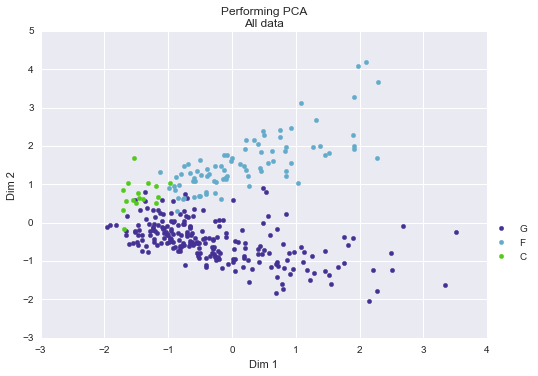

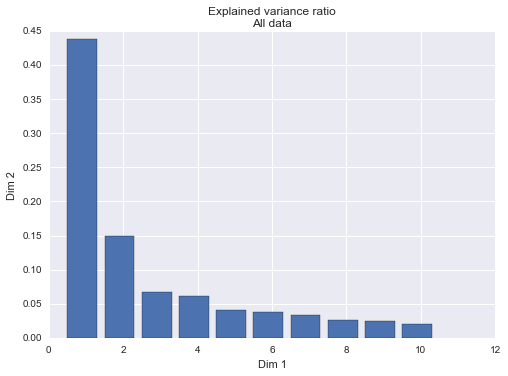

In [90]:
plotClustering(df_num, labels_all, 'All data')

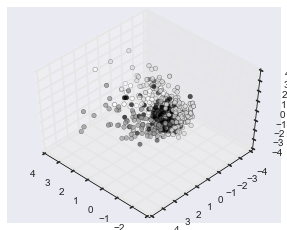

In [91]:
plotClustering(df_num, labels_all, 'All data', dim=3)

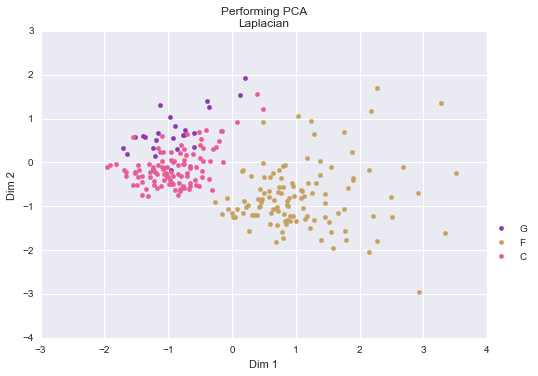

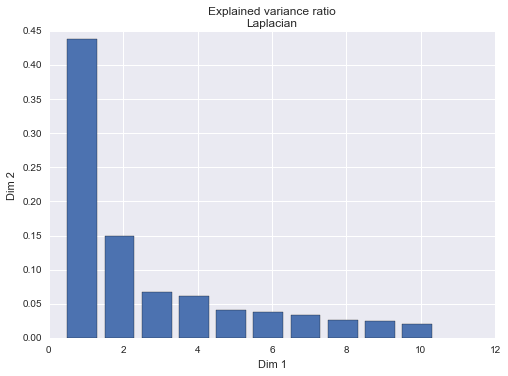

In [92]:
plotClustering(df_num, labels_laplacian, 'Laplacian')

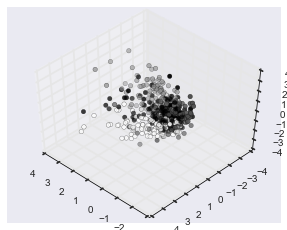

In [93]:
plotClustering(df_num, labels_laplacian, 'Laplacian score', dim=3)

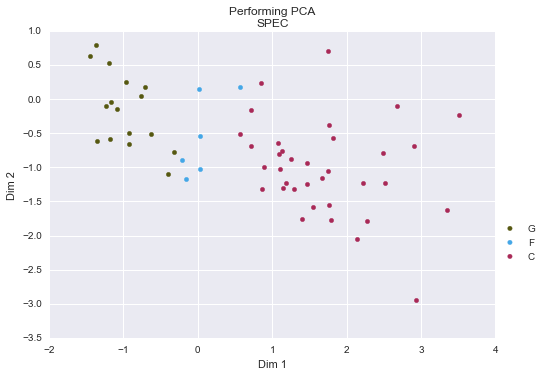

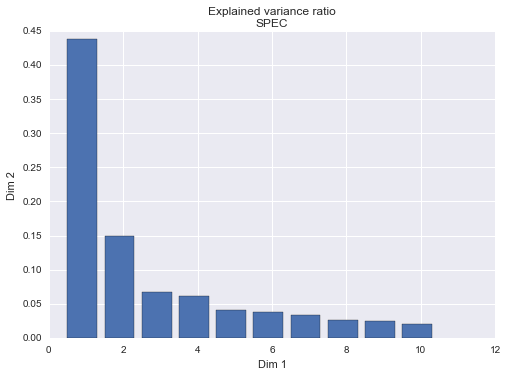

In [94]:
plotClustering(df_num, labels_spec, 'SPEC')

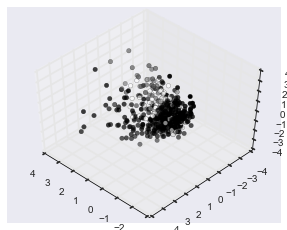

In [95]:
plotClustering(df_num, labels_spec, 'SPEC', dim=3)

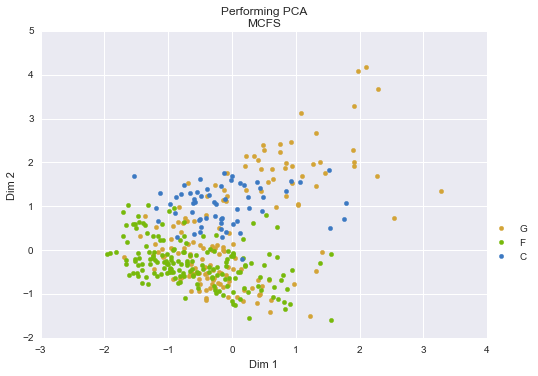

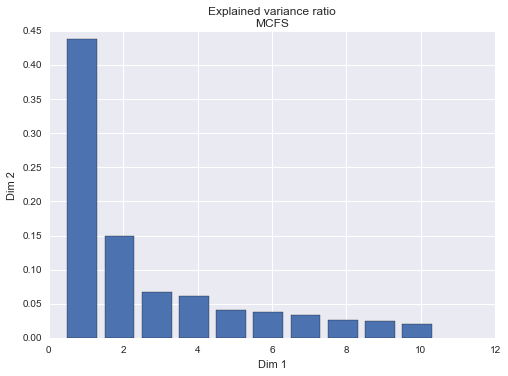

In [96]:
plotClustering(df_num, labels_mcfs, 'MCFS')

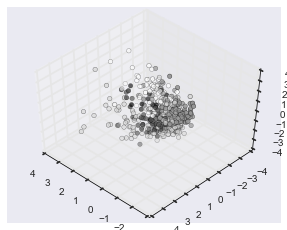

In [97]:
plotClustering(df_num, labels_mcfs, 'MCFS', dim=3)

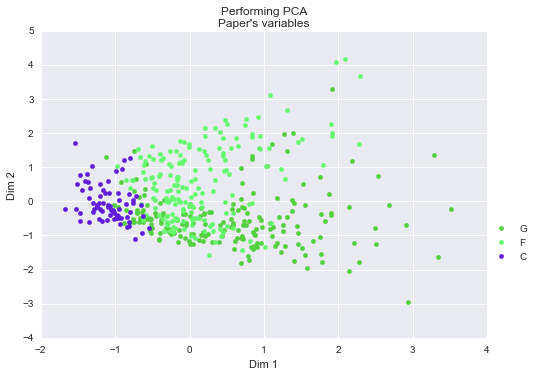

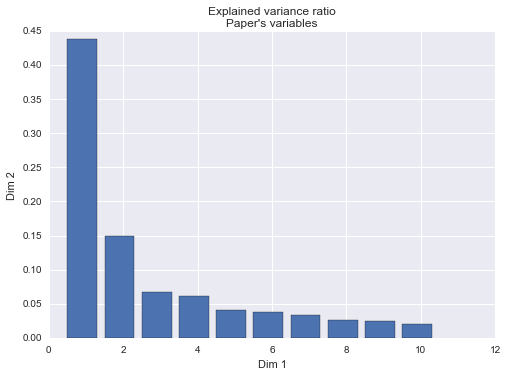

In [98]:
plotClustering(df_num, labels_papers, "Paper's variables")

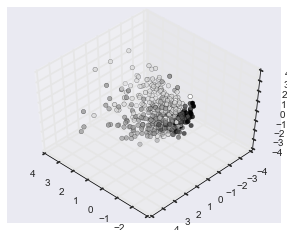

In [99]:
plotClustering(df_num, labels_papers, "Paper's variables", dim=3)

<div class="alert alert-success">
    <h2>
        ANALYSIS
    </h2>
</div>

Some sets of features yielded reasonably good results. There was a lot of improvement due to the reduction of the number of positions

We had an accuracy of 48.7% using the features obtained using the Laplacian score method. Using all the data or just the features cited in the paper also produced good accuracies

This algorithm could predict as well as traditional unsupervised algorithms. This could indicate that topological methods are a good tool for analyzing our data